### 4.1.1 Visualização das séries temporais de cada estação


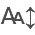

In [10]:
import pandas as pd
from itables import init_notebook_mode, show
import itables.options as opt
import warnings

# Remove os warnings
warnings.filterwarnings('ignore')

# Leitura do arquivo 
df = pd.read_csv('https://lcqar.ufsc.br/files/2023/CO/ES0001RA007.csv')

# Inicia a planilha iterativa
init_notebook_mode(all_interactive=True)
opt.maxBytes = 0

# Configura o layout
opt.classes = "display compact stripe"
opt.columnDefs = [{"targets": "_all", "className": "dt-rigth"},   
                  {"targets": [0,1],  # First column
                   "width": "60px",  # or "10%" if you prefer relative size
                   "className": "dt-right"  # optional: left-align
                  },]  # Align text right
opt.style = "font-size: 11px; white-space: normal;div.dt-buttons button {font-size: 10px !important; padding: 4px 6px;"  # Apply font size and enable wrapping
opt.lengthMenu = [5, 10, 25]

# Mostra a planilha
show(df, buttons=[ "csvHtml5", "excelHtml5","columnsToggle"],
             layout={"top1": "searchPanes"},
             searchPanes={"layout": "columns-3", "cascadePanes": True, "columns": [0,1,2]},
             allow_html=True,
             keys=True,
             escape=False,
             index=False,)

In [17]:
# Rodar para todas e armazenar em _static

import scripts.timeSeriesFigures as tsf
import pandas as pd

rootPath = os.path.dirname(os.getcwd())
aqmdata = pd.read_csv(rootPath+'/data/Monitoramento_Qar_BR_teste.csv')

for index, row in aqmdata.iterrows(): 
    ID_MMA_COMPLETO = row.ID_MMA_COMPLETO
    pollutant = row.POLUENTE
    # COLOCAR CAMINHO CORRETO
    df = pd.read_csv('https://lcqar.ufsc.br/files/2023/'+pollutant+'/'+ID_MMA_COMPLETO+'.csv')
    
    #ID_MMA_COMPLETO = 'RS0009_MP10'
    tsf.iterative_timeseries(df,ID_MMA_COMPLETO)

UF                   CIDADE  COD_IBGE       ID_OEMA ID_MMA  PROPRIETARIO  \
0  AM    Presidente Figueiredo       NaN  SEMA_DCAM_49    NaN           NaN   
1  AM    Presidente Figueiredo       NaN  SEMA_DCAM_49    NaN           NaN   
2  AM         Rio Preto da Eva       NaN  SEMA_DCAM_50    NaN           NaN   
3  AM         Rio Preto da Eva       NaN  SEMA_DCAM_51    NaN           NaN   
4  AM  São Sebastião do Uatumã       NaN  SEMA_DCAM_55    NaN           NaN   

   PROP_ENTIDADE  OPERADOR  OP_ENTIDADE FUNCIONAMENTO  ...  INICIO  FIM  \
0            NaN       NaN          NaN    Automática  ...     NaN  NaN   
1            NaN       NaN          NaN    Automática  ...     NaN  NaN   
2            NaN       NaN          NaN    Automática  ...     NaN  NaN   
3            NaN       NaN          NaN    Automática  ...     NaN  NaN   
4            NaN       NaN          NaN    Automática  ...     NaN  NaN   

   LATITUDE  LONGITUDE MONITORAR          FONTE  CODIGO        TIPO  \
0  -2.04971  -60.00384       NaN  Consulta 2024     NaN  Automática   
1  -2.04971  -60.00384       NaN  Consulta 2024     NaN  Automática   
2  -2.69625  -59.70243       NaN  Consulta 2024     NaN  Automática   
3  -2.69625  -59.70243       NaN  Consulta 2024     NaN  Automática   
4  -2.56276  -57.87267       NaN  Consulta 2024     NaN  Automática   

      CERTIFICACAO EXEMPLO  
0  Não Certificada     NaN  
1  Não Certificada     NaN  
2  Não Certificada     NaN  
3  Não Certificada     NaN  
4  Não Certificada     NaN  

[5 rows x 30 columns]

AttributeError: 'Series' object has no attribute 'ID_MMA_COMPLETO'

**CRIAR FOLIUM PARA VISUALIZAR AS SÉRIES**

In [13]:
import os
import pandas as pd
import json
from IPython.display import display, HTML

# Load CSV

# Caminho para a pasta de dados
rootPath = os.path.dirname(os.getcwd())

# Lendo o csv
df = pd.read_csv(rootPath+'/data/Monitoramento_QAr_BR.csv',encoding = 'unicode_escape')

# Group pollutants by station
station_pollutants = df.groupby("ID_OEMA")["POLUENTE"].apply(list).to_dict()

# JSON for JS
js_data = json.dumps(station_pollutants)

# Default station and pollutant
initial_station = list(station_pollutants.keys())[0]
initial_pollutant = station_pollutants[initial_station][0]

# Generate HTML/JS block
html_block = f"""
<script>
const stationPollutants = {js_data};

function updatePollutants() {{
    const station = document.getElementById('station-select').value;
    const pollutantSelect = document.getElementById('pollutant-select');
    
    // Clear existing options
    pollutantSelect.innerHTML = '';

    // Add new options for selected station
    stationPollutants[station].forEach(p => {{
        const option = document.createElement('option');
        option.value = p;
        option.text = p;
        pollutantSelect.appendChild(option);
    }});

    // Show first available pollutant by default
    updateFigure();
}}

function updateFigure() {{
    const station = document.getElementById('station-select').value;
    const pollutant = document.getElementById('pollutant-select').value;
    const filename = `../_static/${{station}}_${{pollutant}}.html`;
    document.getElementById('figure-frame').src = filename;
}}
</script>

<label for="station-select">Estação:</label>
<select id="station-select" onchange="updatePollutants()">
  {''.join([f'<option value="{s}">{s}</option>' for s in station_pollutants])}
</select>

<label for="pollutant-select" style="margin-left:20px;">Poluente:</label>
<select id="pollutant-select" onchange="updateFigure()">
  {''.join([f'<option value="{p}">{p}</option>' for p in station_pollutants[initial_station]])}
</select>

<br><br>

<iframe
  id="figure-frame"
  src="../_static/{initial_station}_{initial_pollutant}.html"
  width="100%"
  height="600"
  style="border: 1px solid #ccc;">
</iframe>
"""

display(HTML(html_block))


In [83]:
# Caminho para a pasta de dados (exemplo)
rootPath = os.path.dirname(os.getcwd())

# Lendo o csv
aqmdata = pd.read_csv(rootPath+'/data/Monitoramento_QAr_BR.csv', encoding='unicode_escape')
aqmdata['status_category'] = aqmdata['STATUS'].apply(lambda x: x.split('\n')[0][0].upper())+aqmdata['CATEGORIA'].apply(lambda x: x.split('\n')[0][0].upper())

import numpy as np
np.unique(aqmdata['status_category'])

array(['AI', 'AR', 'II', 'IR'], dtype=object)

In [88]:
import os
import folium
import pandas as pd
import base64

# Caminho para a pasta de dados (exemplo)
rootPath = os.path.dirname(os.getcwd())

# Lendo o csv
aqmdata = pd.read_csv(rootPath+'/data/Monitoramento_QAr_BR.csv', encoding='unicode_escape')
aqmdata['status_category'] = aqmdata['STATUS'].apply(lambda x: x.split('\n')[0][0].upper())+aqmdata['CATEGORIA'].apply(lambda x: x.split('\n')[0][0].upper())
color_map = {
    'AR': '#038cfc',
    'IR': '#c8f2fa',
    'AI': '#f08432',
    'II': '#ffea8f'
}
# Criando o mapa centralizado na média das coordenadas
map_clusters = folium.Map(
    location=[aqmdata['LATITUDE'].mean(), aqmdata['LONGITUDE'].mean()],
    tiles="OpenStreetMap",
    zoom_start=5
)

brazil_bounds = [[-33.75, -73.98], [5.27, -34.79]]
map_clusters.fit_bounds(brazil_bounds)
map_clusters.options['maxBounds'] = brazil_bounds


# Removendo linhas com latitude ou longitude faltantes
aqmdata = aqmdata.dropna(subset=['LATITUDE', 'LONGITUDE'])


# Adiciona os marcadores com o popup que exibe o botão para mostrar o iframe
for index, row in aqmdata.iterrows():
    popup_html = """
        Estação: """+row.ID_OEMA +\
        """<br>Cidade: """+row.CIDADE +\
        """
        <br><a href="""+'../_static/stationA_PM25.html'+""" target="_blank">Visualizar série temporal</a>
        </button>
    """
    popup = folium.Popup(popup_html, max_width=1000, max_height=600,)
    
    folium.CircleMarker(
        location=[row['LATITUDE'], row['LONGITUDE']],
        radius=4,
        fill=True,
        fill_opacity=0.7,
        popup=popup,
        color=color_map.get(row['status_category'], 'gray'),
        fill_color=color_map.get(row['status_category'], 'gray')
    ).add_to(map_clusters)
    # Add legend
    legend_html = """
    <div style="
        position: fixed;
        bottom: 50px;
        left: 50px;
        width: 160px;
        background-color: white;
        border:2px solid grey;
        z-index:9999;
        font-size:14px;
        padding: 10px;
        ">
    <b>Legenda</b><br>
    <i style="background:#038cfc; width:10px; height:10px; float:left; margin-right:5px; opacity:0.9;"></i> Referência/Ativa<br>
    <i style="background:#c8f2fa; width:10px; height:10px; float:left; margin-right:5px; opacity:0.9;"></i> Referência/Inativa<br>
    <i style="background:#f08432; width:10px; height:10px; float:left; margin-right:5px; opacity:0.9;"></i> Indicativa/Ativa<br>
    <i style="background:#ffea8f; width:10px; height:10px; float:left; margin-right:5px; opacity:0.9;"></i> Referência/Inativa<br>
    </div>
    """
    map_clusters.get_root().html.add_child(folium.Element(legend_html))

map_clusters

